In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from net import train, run_test, evaluate_classifn
from layer import Dense
from activations import Tanh, Softmax, Sigmoid, ReLU, SoftPlus
from losses import mse, mse_prime, categorical_crossentropy, categorical_crossentropy_prime
from datautils import my_train_test_split, encode_categories

In [2]:
iris_data = pd.read_csv('./data/iris.csv')

In [3]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
from net import encode_categories

all_species = np.unique(iris_data['species'])
encoded_species = encode_categories(iris_data['species'], all_species)
encoded_species_df = pd.DataFrame(encoded_species, columns=all_species)


iris_df = pd.concat([iris_data, encoded_species_df], axis=1)
iris_df.drop('species', axis=1, inplace=True)


#### Splitting


In [5]:
x_train, y_train, x_test, y_test = my_train_test_split(df=iris_df, y_columns=['setosa', 'versicolor', 'virginica'], random_state=2, test_size=0.25)


['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [10]:
x_train.shape

(112, 4, 1)

#### Network creation

In [6]:
iris_network = [
    Dense(4, 2),
    Tanh(),
    Dense(2, 3),
    Softmax(3, 3)
]

#### Training 

In [7]:
err_history = train(network=iris_network, X_train=x_train, Y_train=y_train, loss=mse, loss_grad=mse_prime, shuffle=True, epochs=1000, alpha=0.022)


error for epoch  1 =  0.3736036268035359
error for epoch  2 =  0.32931081649258914
error for epoch  3 =  0.2800532412875295
error for epoch  4 =  0.2627952845080771
error for epoch  5 =  0.2597911223046702
error for epoch  6 =  0.25864750293900857
error for epoch  7 =  0.2575626534829231
error for epoch  8 =  0.2563073158796536
error for epoch  9 =  0.25480815699231485
error for epoch  10 =  0.252997998926098
error for epoch  11 =  0.25079955993887937
error for epoch  12 =  0.248129403014457
error for epoch  13 =  0.2449183007163653
error for epoch  14 =  0.24115923356168806
error for epoch  15 =  0.23698790953415724
error for epoch  16 =  0.23275556919996682
error for epoch  17 =  0.22897916159877574
error for epoch  18 =  0.22609665312978625
error for epoch  19 =  0.22421476304088098
error for epoch  20 =  0.2231222066930498
error for epoch  21 =  0.222503690765305
error for epoch  22 =  0.2220993855325221
error for epoch  23 =  0.22172941021234951
error for epoch  24 =  0.2212414943

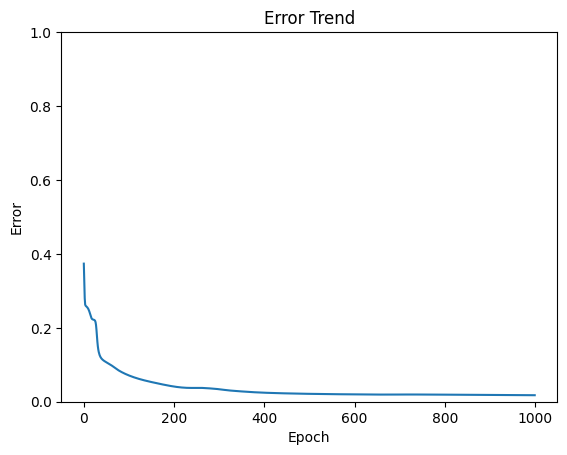

In [8]:
plt.plot(err_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.ylim(0, 1)
plt.title('Error Trend')
plt.show()

#### Testing

In [9]:

y_pred = run_test(iris_network, x_test)

In [ ]:
evaluate_classifn(y_test, y_pred)

Network accuracy ☢️ 0.8947368421052632
